# Assignment1
     Clayton Cohn
     April 2, 2020
     DSC478
     Prof. Mobasher

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = '/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/bank_data.csv'

In [3]:
df = pd.read_csv(DATA_PATH, delimiter=',')

In [4]:
# Save these now for graphs (non-normalized) later
income = df.income
age = df.age

In [5]:
df.head(5)

id  age   income  children  gender      region married  car  \
0  ID12101   48  17546.0         1  FEMALE  INNER_CITY      NO   NO   
1  ID12102   40  30085.1         3    MALE        TOWN     YES  YES   
2  ID12103   51  16575.4         0  FEMALE  INNER_CITY     YES  YES   
3  ID12104   23  20375.4         3  FEMALE        TOWN     YES   NO   
4  ID12105   57  50576.3         0  FEMALE       RURAL     YES   NO   

  savings_acct current_acct mortgage  pep  
0           NO           NO       NO  YES  
1           NO          YES      YES   NO  
2          YES          YES       NO   NO  
3           NO          YES       NO   NO  
4          YES           NO       NO   NO

*1. Explore the general characteristics of the data as a whole: examine the __means__, __standard deviations__, and __other statistics__ associated with the numerical attributes; also __show the distributions of values__ associated with categorical attributes*

In [6]:
# means
print("Means:")
print(df[["age","income","children"]].mean())
print("\n")

#standard deviations
print("\nStandard deviations:")
print(df[["age","income","children"]].std())
print("\n")

#description
print("Description:")
print(df[["age","income","children"]].describe())
print("\n")

#correlation matrix
print("Correlation:")
print(df[["age","income","children"]].corr())

Means:
age            42.395000
income      27524.031217
children        1.011667
dtype: float64



Standard deviations:
age            14.424947
income      12899.468246
children        1.056752
dtype: float64


Description:
              age        income    children
count  600.000000    600.000000  600.000000
mean    42.395000  27524.031217    1.011667
std     14.424947  12899.468246    1.056752
min     18.000000   5014.210000    0.000000
25%     30.000000  17264.500000    0.000000
50%     42.000000  24925.300000    1.000000
75%     55.250000  36172.675000    2.000000
max     67.000000  63130.100000    3.000000


Correlation:
               age    income  children
age       1.000000  0.752726  0.023572
income    0.752726  1.000000  0.036761
children  0.023572  0.036761  1.000000


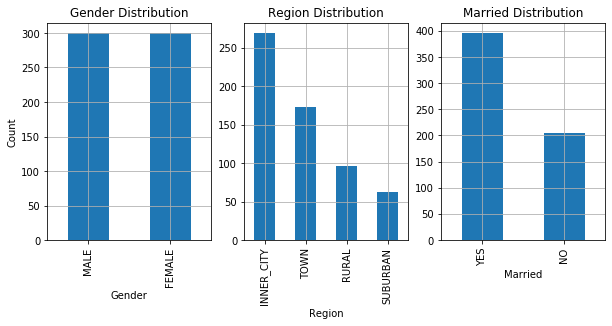

In [7]:
# categorical attributes - gender
gender = df["gender"].value_counts()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
ax1.set_title("Gender Distribution")
gender.plot(kind='bar', grid = True)

# categorical attributes - region
region = df["region"].value_counts()
ax1 = fig.add_subplot(132)
ax1.set_xlabel('Region')
ax1.set_title("Region Distribution")
region.plot(kind='bar', grid = True)

# categorical attributes - married
married = df["married"].value_counts()
ax1 = fig.add_subplot(133)
ax1.set_xlabel('Married')
ax1.set_title("Married Distribution")
married.plot(kind='bar', grid = True)

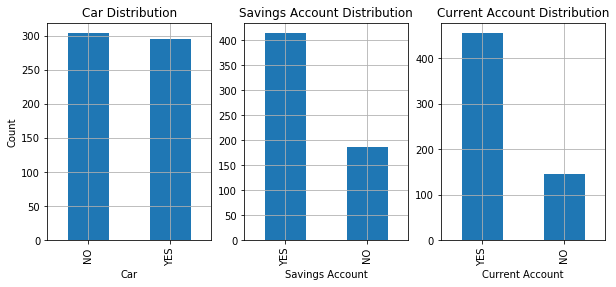

In [8]:
plt.clf()
plt.cla()
plt.close()

# categorical attributes - car
car = df["car"].value_counts()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(131)
ax1.set_xlabel('Car')
ax1.set_ylabel('Count')
ax1.set_title("Car Distribution")
car.plot(kind='bar', grid = True)

# categorical attributes - savings account
savings = df["savings_acct"].value_counts()
ax1 = fig.add_subplot(132)
ax1.set_xlabel('Savings Account')
ax1.set_title("Savings Account Distribution")
savings.plot(kind='bar', grid = True)

# categorical attributes - current account
current = df["current_acct"].value_counts()
ax1 = fig.add_subplot(133)
ax1.set_xlabel('Current Account')
ax1.set_title("Current Account Distribution")
current.plot(kind='bar', grid = True)

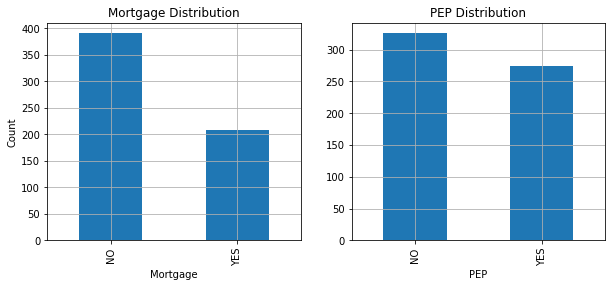

In [9]:
plt.clf()
plt.cla()
plt.close()

# categorical attributes - mortgage
mortgage = df["mortgage"].value_counts()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Mortgage')
ax1.set_ylabel('Count')
ax1.set_title("Mortgage Distribution")
mortgage.plot(kind='bar', grid = True)

# categorical attributes - pep
pep = df["pep"].value_counts()
ax1 = fig.add_subplot(122)
ax1.set_xlabel('PEP')
ax1.set_title("PEP Distribution")
pep.plot(kind='bar', grid = True)

*2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. __Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes (you do not need to plot distributions).__ Can you observe any significant differences between these segments of customers? Discuss your observations.*

In [10]:
print(df.groupby("pep").describe().T)

pep                       NO           YES
age      count    326.000000    274.000000
         mean      40.098160     45.127737
         std       14.123506     14.327991
         min       18.000000     18.000000
         25%       27.000000     34.000000
         50%       40.000000     45.000000
         75%       51.000000     58.000000
         max       67.000000     67.000000
income   count    326.000000    274.000000
         mean   24900.953374  30644.919453
         std    11661.123422  13609.613043
         min     5014.210000   7756.360000
         25%    15366.475000  19639.475000
         50%    23105.000000  28080.050000
         75%    31210.900000  38458.350000
         max    61554.600000  63130.100000
children count    326.000000    274.000000
         mean       1.067485      0.945255
         std        1.195524      0.860571
         min        0.000000      0.000000
         25%        0.000000      0.000000
         50%        0.000000      1.000000
         75

In [11]:
pep_yes = df[df['pep'] == 'YES']
pep_yes.describe(include="all")

id         age        income    children gender      region  \
count       274  274.000000    274.000000  274.000000    274         274   
unique      274         NaN           NaN         NaN      2           4   
top     ID12143         NaN           NaN         NaN   MALE  INNER_CITY   
freq          1         NaN           NaN         NaN    144         123   
mean        NaN   45.127737  30644.919453    0.945255    NaN         NaN   
std         NaN   14.327991  13609.613043    0.860571    NaN         NaN   
min         NaN   18.000000   7756.360000    0.000000    NaN         NaN   
25%         NaN   34.000000  19639.475000    0.000000    NaN         NaN   
50%         NaN   45.000000  28080.050000    1.000000    NaN         NaN   
75%         NaN   58.000000  38458.350000    1.000000    NaN         NaN   
max         NaN   67.000000  63130.100000    3.000000    NaN         NaN   

       married  car savings_acct current_acct mortgage  pep  
count      274  274          274          274      274  274  
unique       2    2            2            2        2    1  
top        YES  YES          YES          YES       NO  YES  
freq       154  138          179          211      182  274  
mean       NaN  NaN          NaN          NaN      NaN  NaN  
std        NaN  NaN          NaN          NaN      NaN  NaN  
min        NaN  NaN          NaN          NaN      NaN  NaN  
25%        NaN  NaN          NaN          NaN      NaN  NaN  
50%        NaN  NaN          NaN          NaN      NaN  NaN  
75%        NaN  NaN          NaN          NaN      NaN  NaN  
max        NaN  NaN          NaN          NaN      NaN  NaN

In [12]:
pep_no = df[df['pep'] == 'NO']
pep_no.describe(include="all")

id         age        income    children  gender      region  \
count       326  326.000000    326.000000  326.000000     326         326   
unique      326         NaN           NaN         NaN       2           4   
top     ID12696         NaN           NaN         NaN  FEMALE  INNER_CITY   
freq          1         NaN           NaN         NaN     170         146   
mean        NaN   40.098160  24900.953374    1.067485     NaN         NaN   
std         NaN   14.123506  11661.123422    1.195524     NaN         NaN   
min         NaN   18.000000   5014.210000    0.000000     NaN         NaN   
25%         NaN   27.000000  15366.475000    0.000000     NaN         NaN   
50%         NaN   40.000000  23105.000000    0.000000     NaN         NaN   
75%         NaN   51.000000  31210.900000    2.000000     NaN         NaN   
max         NaN   67.000000  61554.600000    3.000000     NaN         NaN   

       married  car savings_acct current_acct mortgage  pep  
count      326  326          326          326      326  326  
unique       2    2            2            2        2    1  
top        YES   NO          YES          YES       NO   NO  
freq       242  168          235          244      209  326  
mean       NaN  NaN          NaN          NaN      NaN  NaN  
std        NaN  NaN          NaN          NaN      NaN  NaN  
min        NaN  NaN          NaN          NaN      NaN  NaN  
25%        NaN  NaN          NaN          NaN      NaN  NaN  
50%        NaN  NaN          NaN          NaN      NaN  NaN  
75%        NaN  NaN          NaN          NaN      NaN  NaN  
max        NaN  NaN          NaN          NaN      NaN  NaN

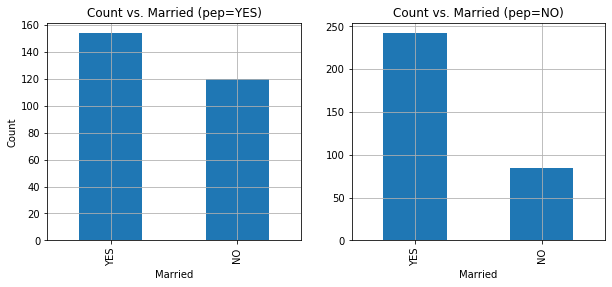

In [13]:
plt.clf()
plt.cla()
plt.close()

pep_yes_plt = pep_yes["married"].value_counts()
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Married')
ax1.set_ylabel('Count')
ax1.set_title("Count vs. Married (pep=YES)")
pep_yes_plt.plot(kind='bar', grid = True)

pep_no_plt = pep_no["married"].value_counts()
ax1 = fig.add_subplot(122)
ax1.set_xlabel('Married')
ax1.set_title("Count vs. Married (pep=NO)")
pep_no_plt.plot(kind='bar', grid = True)

Comparing those customers who opted for a PEP and those who didn't, we notice a few things:
- Those who opted for the PEP were typically older than those who didn't.
- Those who opted for the PEP typically had greater incomes than those who didn't.
- Both categories had roughly the same number of children.
- Those who chose to forgo the PEP were nearly three times more likely to be married.

3. *__Use z-score normalization__ to standardize the values of the income attribute. [Do not change the original income attribute in the table.]*

In [14]:
df['income_zscore'] = (df.income-df.income.mean()) / df.income.std()
df.sample(10)

id  age    income  children  gender      region married  car  \
555  ID12656   20   7723.93         2  FEMALE        TOWN     YES  YES   
84   ID12185   62  24026.10         0    MALE  INNER_CITY     YES   NO   
457  ID12558   65  61554.60         0  FEMALE  INNER_CITY     YES   NO   
124  ID12225   47  45031.90         3    MALE       RURAL      NO  YES   
373  ID12474   52  28413.80         0  FEMALE  INNER_CITY     YES   NO   
134  ID12235   66  59503.80         2  FEMALE        TOWN     YES  YES   
137  ID12238   57  39205.30         0  FEMALE  INNER_CITY      NO   NO   
41   ID12142   47  26952.60         0  FEMALE  INNER_CITY     YES  YES   
138  ID12239   65  42173.90         0  FEMALE       RURAL     YES   NO   
517  ID12618   51  33615.40         1    MALE        TOWN     YES   NO   

    savings_acct current_acct mortgage  pep  income_zscore  
555          YES          YES       NO   NO      -1.534955  
84            NO          YES      YES  YES      -0.271169  
457          YES          YES       NO   NO       2.638137  
124          YES           NO       NO  YES       1.357255  
373           NO          YES       NO   NO       0.068977  
134          YES          YES      YES  YES       2.479154  
137          YES          YES       NO  YES       0.905562  
41            NO          YES       NO   NO      -0.044299  
138          YES          YES       NO   NO       1.135696  
517          YES           NO      YES  YES       0.472219

4. *__Discretize the age attribute into 3 categories__ (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]*

In [15]:
df['age_discret'] = pd.qcut(df.age,
                        [0,.33,.67,1], 
                        labels = ['YOUNG', 'MID-AGE', 'OLD'])
df.sample(10)

id  age    income  children  gender      region married  car  \
117  ID12218   26  10044.10         3    MALE  INNER_CITY     YES   NO   
213  ID12314   28  13175.50         1    MALE        TOWN      NO   NO   
47   ID12148   29  13106.60         2    MALE  INNER_CITY      NO   NO   
328  ID12429   57  50849.20         1  FEMALE       RURAL      NO   NO   
235  ID12336   49  16711.30         1  FEMALE  INNER_CITY      NO   NO   
120  ID12221   46  29525.50         2    MALE       RURAL      NO   NO   
1    ID12102   40  30085.10         3    MALE        TOWN     YES  YES   
416  ID12517   36  12533.20         1    MALE  INNER_CITY      NO   NO   
71   ID12172   21   8062.73         0    MALE  INNER_CITY      NO   NO   
297  ID12398   18   8639.24         2    MALE       RURAL     YES   NO   

    savings_acct current_acct mortgage  pep  income_zscore age_discret  
117          YES          YES      YES   NO      -1.355089       YOUNG  
213           NO          YES       NO  YES      -1.112335       YOUNG  
47           YES          YES      YES  YES      -1.117676       YOUNG  
328          YES           NO      YES  YES       1.808227         OLD  
235          YES          YES      YES  YES      -0.838231     MID-AGE  
120          YES           NO      YES   NO       0.155159     MID-AGE  
1             NO          YES      YES   NO       0.198541     MID-AGE  
416          YES           NO      YES   NO      -1.162128     MID-AGE  
71            NO          YES       NO  YES      -1.508690       YOUNG  
297           NO           NO       NO   NO      -1.463998       YOUNG

*5. Go back to the original data (before the transforamtions in parts 3 and 4 above) and __use Min-Max Normalization to transform the values of all numeric attributes__ (income, age, children) in the original table onto the range 0.0-1.0.*

In [16]:
df.income = (df.income - min(df.income)) / (max(df.income)-min(df.income))
df.age = (df.age - min(df.age)) / (max(df.age)-min(df.age))
df.children = (df.children - min(df.children)) / (max(df.children)-min(df.children))

df.sample(10)

id       age    income  children  gender      region married  car  \
355  ID12456  0.734694  0.777273  0.666667  FEMALE       RURAL     YES   NO   
232  ID12333  0.265306  0.155625  0.000000    MALE    SUBURBAN     YES   NO   
280  ID12381  0.285714  0.297915  0.333333    MALE  INNER_CITY     YES   NO   
34   ID12135  0.510204  0.559360  0.000000    MALE    SUBURBAN      NO   NO   
4    ID12105  0.795918  0.783987  0.000000  FEMALE       RURAL     YES   NO   
268  ID12369  0.918367  0.509516  0.000000  FEMALE        TOWN     YES  YES   
21   ID12122  0.653061  0.197590  0.666667    MALE        TOWN     YES   NO   
481  ID12582  0.591837  0.682161  0.666667    MALE  INNER_CITY      NO  YES   
210  ID12311  0.877551  0.334846  0.000000    MALE  INNER_CITY      NO  YES   
507  ID12608  0.081633  0.113243  0.000000  FEMALE    SUBURBAN      NO  YES   

    savings_acct current_acct mortgage  pep  income_zscore age_discret  
355          YES          YES      YES  YES       1.756822         OLD  
232           NO          YES      YES  YES      -1.043883       YOUNG  
280           NO           NO       NO  YES      -0.402825       YOUNG  
34           YES          YES       NO  YES       0.775061     MID-AGE  
4            YES           NO       NO   NO       1.787071         OLD  
268           NO          YES       NO   NO       0.550501         OLD  
21           YES          YES       NO   NO      -0.854821         OLD  
481          YES          YES       NO  YES       1.328316     MID-AGE  
210           NO           NO       NO  YES      -0.236439         OLD  
507          YES          YES       NO  YES      -1.234829       YOUNG

*6. __Convert the table__ (after normalization in part 5) into the standard spreadsheet format. Note that this requires __converting each categorical attribute into multiple binary ("dummy") attributes__ (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. __Save this new table into a file called bank_numeric.csv and submit it along with your assignment__. [Hint: you might consider using the __get_dummies__ for Pandas data frames.]*

In [17]:
# Replace categorical variables with dummies
df_ssf = pd.get_dummies(df,columns=['gender','region','married','car','savings_acct',
                                    'current_acct','mortgage','pep','age_discret'])
df_ssf.sample(10)

id       age    income  children  income_zscore  gender_FEMALE  \
116  ID12217  0.775510  0.287634  0.666667      -0.449145              1   
578  ID12679  0.000000  0.022025  0.000000      -1.645790              0   
242  ID12343  1.000000  0.520499  0.333333       0.599984              0   
160  ID12261  0.102041  0.238515  0.666667      -0.670441              0   
171  ID12272  0.081633  0.253151  0.666667      -0.604500              0   
291  ID12392  0.530612  0.589157  0.000000       0.909306              1   
355  ID12456  0.734694  0.777273  0.666667       1.756822              1   
313  ID12414  0.000000  0.190924  0.666667      -0.884853              1   
219  ID12320  0.346939  0.405818  0.000000       0.083311              1   
577  ID12678  0.897959  0.693929  0.000000       1.381334              0   

     gender_MALE  region_INNER_CITY  region_RURAL  region_SUBURBAN  ...  \
116            0                  0             0                0  ...   
578            1                  1             0                0  ...   
242            1                  1             0                0  ...   
160            1                  1             0                0  ...   
171            1                  1             0                0  ...   
291            0                  1             0                0  ...   
355            0                  0             1                0  ...   
313            0                  0             1                0  ...   
219            0                  1             0                0  ...   
577            1                  0             0                0  ...   

     savings_acct_YES  current_acct_NO  current_acct_YES  mortgage_NO  \
116                 1                1                 0            1   
578                 1                0                 1            0   
242                 1                0                 1            1   
160                 1                0                 1            1   
171                 0                0                 1            1   
291                 1                1                 0            1   
355                 1                0                 1            0   
313                 1                0                 1            1   
219                 1                0                 1            1   
577                 1                1                 0            1   

     mortgage_YES  pep_NO  pep_YES  age_discret_YOUNG  age_discret_MID-AGE  \
116             0       1        0                  0                    0   
578             1       1        0                  1                    0   
242             0       0        1                  0                    0   
160             0       1        0                  1                    0   
171             0       1        0                  1                    0   
291             0       0        1                  0                    1   
355             1       0        1                  0                    0   
313             0       1        0                  1                    0   
219             0       1        0                  1                    0   
577             0       0        1                  0                    0   

     age_discret_OLD  
116                1  
578                0  
242                1  
160                0  
171                0  
291                0  
355                1  
313                0  
219                0  
577                1  

[10 rows x 26 columns]

In [18]:
# Save to hard drive
df_ssf.to_csv("/Users/claytoncohn/Dropbox/New/DePaul/DSC478/data/bank_numeric.csv",sep=',')

*7. Using the data set with the dummy variables (of the previous part), __perform basic correlation analysis__ among the attributes. __Discuss your results by indicating any significant positive or negative correlations__ among pairs of attributes. You need to construct a complete Correlation Matrix. __Be sure to first remove the Customer ID column__ before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].*

In [19]:
# First drop id column
df_ssf.drop(columns=['id'], inplace=True)
df_ssf.head(10)

age    income  children  income_zscore  gender_FEMALE  gender_MALE  \
0  0.612245  0.215634  0.333333      -0.773523              1            0   
1  0.448980  0.431395  1.000000       0.198541              0            1   
2  0.673469  0.198933  0.000000      -0.848766              1            0   
3  0.102041  0.264320  1.000000      -0.554180              1            0   
4  0.795918  0.783987  0.000000       1.787071              1            0   
5  0.795918  0.565343  0.666667       0.802015              1            0   
6  0.081633  0.066468  0.000000      -1.445560              0            1   
7  0.816327  0.342977  0.000000      -0.199809              0            1   
8  0.387755  0.349132  0.666667      -0.172079              1            0   
9  0.734694  0.330338  0.666667      -0.256749              0            1   

   region_INNER_CITY  region_RURAL  region_SUBURBAN  region_TOWN  ...  \
0                  1             0                0            0  ...   
1                  0             0                0            1  ...   
2                  1             0                0            0  ...   
3                  0             0                0            1  ...   
4                  0             1                0            0  ...   
5                  0             0                0            1  ...   
6                  0             1                0            0  ...   
7                  0             0                0            1  ...   
8                  0             0                1            0  ...   
9                  0             0                0            1  ...   

   savings_acct_YES  current_acct_NO  current_acct_YES  mortgage_NO  \
0                 0                1                 0            1   
1                 0                0                 1            0   
2                 1                0                 1            1   
3                 0                0                 1            1   
4                 1                1                 0            1   
5                 1                0                 1            1   
6                 0                0                 1            1   
7                 1                0                 1            1   
8                 0                1                 0            1   
9                 1                0                 1            1   

   mortgage_YES  pep_NO  pep_YES  age_discret_YOUNG  age_discret_MID-AGE  \
0             0       0        1                  0                    1   
1             1       1        0                  0                    1   
2             0       1        0                  0                    0   
3             0       1        0                  1                    0   
4             0       1        0                  0                    0   
5             0       0        1                  0                    0   
6             0       0        1                  1                    0   
7             0       1        0                  0                    0   
8             0       1        0                  0                    1   
9             0       1        0                  0                    0   

   age_discret_OLD  
0                0  
1                0  
2                1  
3                0  
4                1  
5                1  
6                0  
7                1  
8                0  
9                1  

[10 rows x 25 columns]

In [20]:
# Now get correlation matrix
corr_matrix = df_ssf.corr()
corr_matrix

age    income  children  income_zscore  \
age                  1.000000  0.752726  0.023572       0.752726   
income               0.752726  1.000000  0.036761       1.000000   
children             0.023572  0.036761  1.000000       0.036761   
income_zscore        0.752726  1.000000  0.036761       1.000000   
gender_FEMALE        0.090081  0.023845  0.014206       0.023845   
gender_MALE         -0.090081 -0.023845 -0.014206      -0.023845   
region_INNER_CITY   -0.025171 -0.047564 -0.051222      -0.047564   
region_RURAL         0.018635  0.084776  0.089902       0.084776   
region_SUBURBAN      0.031345  0.029824 -0.014122       0.029824   
region_TOWN         -0.008510 -0.036431 -0.007033      -0.036431   
married_NO          -0.010394  0.008386  0.048716       0.008386   
married_YES          0.010394 -0.008386 -0.048716      -0.008386   
car_NO              -0.077733 -0.081556 -0.036455      -0.081556   
car_YES              0.077733  0.081556  0.036455       0.081556   
savings_acct_NO     -0.184389 -0.266164 -0.041536      -0.266164   
savings_acct_YES     0.184389  0.266164  0.041536       0.266164   
current_acct_NO      0.035312 -0.031616 -0.006238      -0.031616   
current_acct_YES    -0.035312  0.031616  0.006238       0.031616   
mortgage_NO          0.016154  0.014662  0.074339       0.014662   
mortgage_YES        -0.016154 -0.014662 -0.074339      -0.014662   
pep_NO              -0.173825 -0.221991  0.057663      -0.221991   
pep_YES              0.173825  0.221991 -0.057663       0.221991   
age_discret_YOUNG   -0.817337 -0.600078  0.018426      -0.600078   
age_discret_MID-AGE  0.005388 -0.009788 -0.071814      -0.009788   
age_discret_OLD      0.822813  0.617752  0.052670       0.617752   

                     gender_FEMALE  gender_MALE  region_INNER_CITY  \
age                       0.090081    -0.090081          -0.025171   
income                    0.023845    -0.023845          -0.047564   
children                  0.014206    -0.014206          -0.051222   
income_zscore             0.023845    -0.023845          -0.047564   
gender_FEMALE             1.000000    -1.000000          -0.023459   
gender_MALE              -1.000000     1.000000           0.023459   
region_INNER_CITY        -0.023459     0.023459           1.000000   
region_RURAL             -0.009092     0.009092          -0.393444   
region_SUBURBAN          -0.010951     0.010951          -0.306032   
region_TOWN               0.040472    -0.040472          -0.573814   
married_NO                0.021110    -0.021110          -0.003254   
married_YES              -0.021110     0.021110           0.003254   
car_NO                    0.006667    -0.006667           0.018143   
car_YES                  -0.006667     0.006667          -0.018143   
savings_acct_NO           0.007207    -0.007207           0.091373   
savings_acct_YES         -0.007207     0.007207          -0.091373   
current_acct_NO          -0.019466     0.019466          -0.007894   
current_acct_YES          0.019466    -0.019466           0.007894   
mortgage_NO               0.066465    -0.066465          -0.002098   
mortgage_YES             -0.066465     0.066465           0.002098   
pep_NO                    0.046843    -0.046843          -0.001054   
pep_YES                  -0.046843     0.046843           0.001054   
age_discret_YOUNG        -0.024487     0.024487           0.065404   
age_discret_MID-AGE      -0.074928     0.074928          -0.097058   
age_discret_OLD           0.099246    -0.099246           0.030148   

                     region_RURAL  region_SUBURBAN  region_TOWN  ...  \
age                      0.018635         0.031345    -0.008510  ...   
income                   0.084776         0.029824    -0.036431  ...   
children                 0.089902        -0.014122    -0.007033  ...   
income_zscore            0.084776         0.029824    -0.036431  ...   
gender_FEMALE           -0.009092        -0.010951     0.040472  ...   
gend

For the purpose of this analyses, I am defining "significant positive or negative correlations" to mean correlation coefficients >= 0.25 and <=-0.25, respectively. I am not including the identify correlation, which will or course always be 1, and I will not be addressing correlations from the same category, e.g. male v. female, or rural v. inner_city. Here is what I observed:
- Age and income (and income_zscore) are highly correlated (0.75), which makes sense...we tend to make more as we gain more experience.
- There is a slight correlation (0.27) between income and savings_account.
- There does not appear to be any significant correlation between age and children, which is a bit surprising. Both age_discret_YOUNG and age_discret_OLD have slightly positive correlations, while age_discret_MID-AGE had a slightly negative one.
- There does not appear to be any significant correlations relating to car, gender, region, or mortgage.
- There is a slight correlation (0.22) between income and pep_YES.
- There is a slight inverse correlation (-0.18) between married and pep_YES.

*8. Using Matplotlib library and/or ploting capabilties of Pandas, __create a scatter plot of the (non-normalized) Income attribute relative to Age__. Be sure that your plot __contains appropriate labels for the axes__. __Do these variables seem correlated__?*

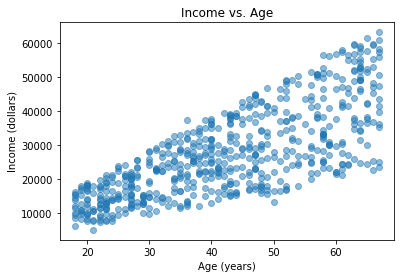

In [21]:
plt.scatter(age, income, alpha=0.5)
plt.title("Income vs. Age")
plt.xlabel("Age (years)")
plt.ylabel("Income (dollars)")
plt.show()

These variables absolutely seem correlated. As we saw in the last problem, the (normalized) correlation between age and income was 0.75. In fact, it was the highest correlation in the table. Here, we can see that correlation visually.

*9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).*

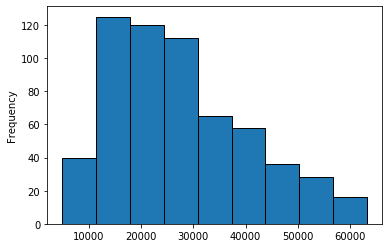

In [22]:
income.plot(kind="hist", bins=9, ec='black')

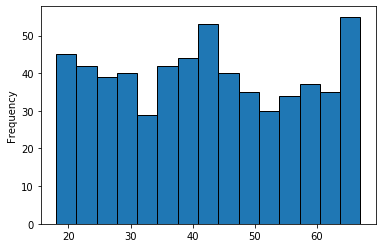

In [23]:
age.plot(kind="hist", bins=15, ec='black')

*10. Using a bargraph, plot the distribution of the values of the region attribute.*

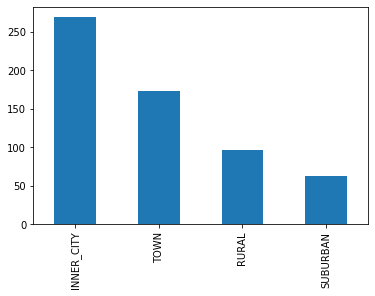

In [24]:
df["region"].value_counts().plot(kind='bar')

*11. __Perform a cross-tabulation of the region attribute with the pep attribute__. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. __Show the results as a 4 by 2 (region x pep) table with entries representing the counts__. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas __create a bar chart graph__ to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]*

In [25]:
region_pep = pd.crosstab(df["region"], df["pep"])
region_pep

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71

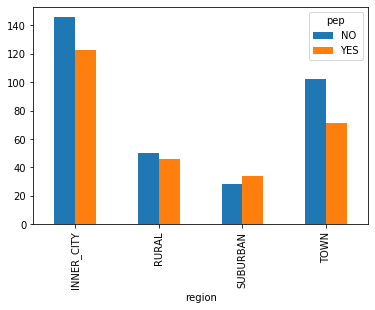

In [26]:
plt.show(region_pep.plot(kind="bar"))